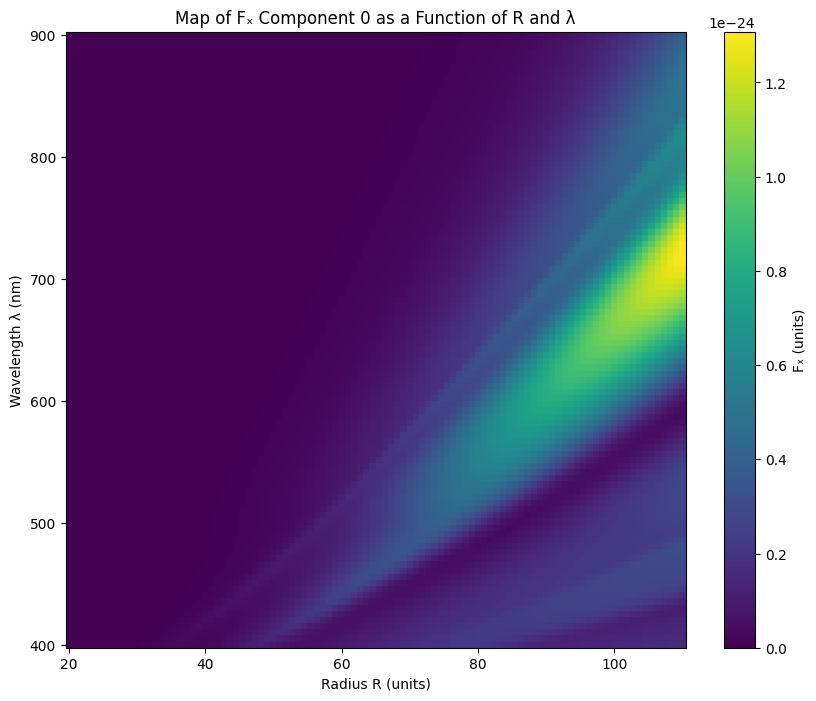

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# Load the computed F_x data
F_x = np.load('F_x.npy')  # Shape: (len(wls), len(R), 8)

# Reconstruct the wls and R arrays used in the computation
wls = np.linspace(400, 900, 100)  # Wavelengths (in nm)
R = np.linspace(20, 110, 100)     # Radii (in appropriate units)

# Choose the component of F_x to plot
# The third dimension has size 8, so select an index from 0 to 7
component_index = 0  # Change this to plot a different component
F_x_component = F_x[:, :, component_index]  # Shape: (len(wls), len(R))

# Create a meshgrid for plotting
WLS, RADIUS = np.meshgrid(wls, R, indexing='ij')  # WLS and RADIUS match the shape of F_x_component

# Plotting the heatmap
plt.figure(figsize=(10, 8))
contour = plt.pcolormesh(RADIUS, WLS, F_x_component, cmap='viridis')
plt.colorbar(contour, label='Fₓ (units)')
plt.xlabel('Radius R (units)')
plt.ylabel('Wavelength λ (nm)')
plt.title(f'Map of Fₓ Component {component_index} as a Function of R and λ')

#plt.savefig('f_x_map.pdf')
plt.show()


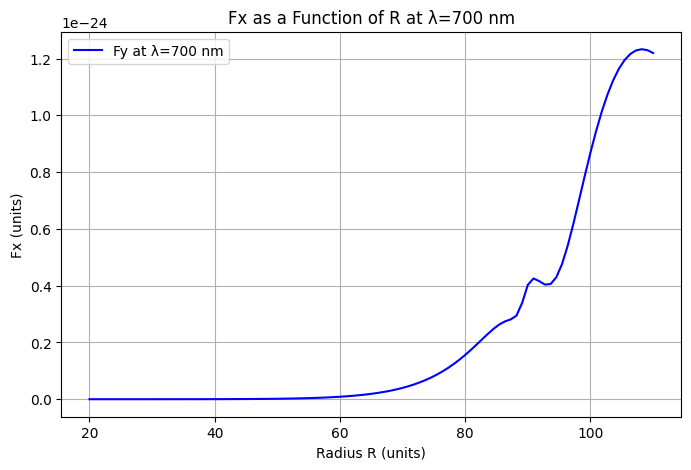

In [47]:
import numpy as np
import matplotlib.pyplot as plt

# Load the computed F_y data
F_x = np.load('F_x.npy')  # Shape: (len(wls), len(R), 8)

# Reconstruct the wls and R arrays used in the computation
wls = np.linspace(400, 900, 100)  # Wavelengths (in nm)
R = np.linspace(20, 110, 100)     # Radii (in appropriate units)

# Choose the component of F_y to plot
component_index = 0  # Change this to plot a different component
F_x_component = F_x[:, :, component_index]  # Shape: (len(wls), len(R))

# Find the index corresponding to λ = 700 nm
lambda_target = 700
lambda_index = np.argmin(np.abs(wls - lambda_target))

# Extract the slice F_y(R) at λ = 700 nm
F_x_slice = F_x_component[lambda_index, :]

# Plot the extracted slice
plt.figure(figsize=(8, 5))
plt.plot(R, F_x_slice, label=f'Fy at λ={lambda_target} nm', color='b')
plt.xlabel('Radius R (units)')
plt.ylabel('Fx (units)')
plt.title(f'Fx as a Function of R at λ={lambda_target} nm')
plt.legend()
plt.grid()
plt.show()

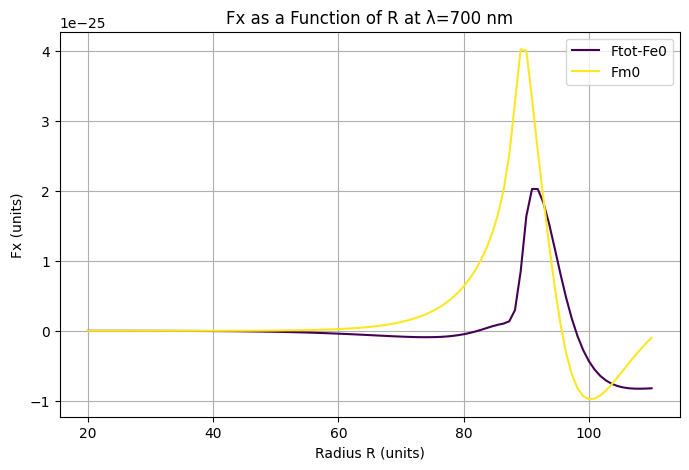

In [58]:
import numpy as np
import matplotlib.pyplot as plt

# Load the computed F_y data
F_x = np.load('F_x.npy')  # Shape: (len(wls), len(R), 8)

labels = ['Ftot', 'Fe0', 'Fe1', 'Fe2', 'Fm0', 'Fm1', 'Fm2', 'Fcross']

# Reconstruct the wls and R arrays used in the computation
wls = np.linspace(400, 900, 100)  # Wavelengths (in nm)
R = np.linspace(20, 110, 100)     # Radii (in appropriate units)

# Find the index corresponding to λ = 700 nm
lambda_target = 700
lambda_index = np.argmin(np.abs(wls - lambda_target))

# Select components to plot (change this list to select specific components)
selected_components = [4]  # Choose from 0 to 7

# Plot all selected components
plt.figure(figsize=(8, 5))
colors = plt.cm.viridis(np.linspace(0, 1, len(selected_components)+1))  # Generate colors for each component

Fxtot = F_x[:, :, 0][lambda_index, :]
Fxe0 = F_x[:, :, 1][lambda_index, :]
plt.plot(R, Fxtot - Fxe0, label='Ftot-Fe0', color=colors[0])

for i, comp in enumerate(selected_components):
    F_x_slice = F_x[:, :, comp][lambda_index, :]
    plt.plot(R, F_x_slice, label=labels[comp], color=colors[i+1])

plt.xlabel('Radius R (units)')
plt.ylabel('Fx (units)')
plt.title(f'Fx as a Function of R at λ={lambda_target} nm')
plt.legend()
plt.grid()
plt.show()

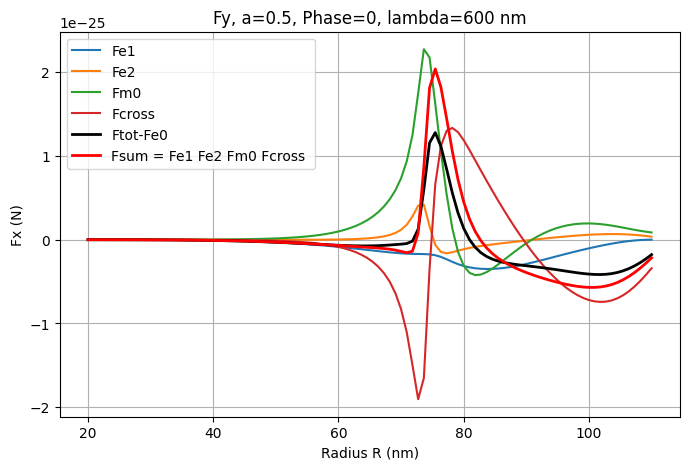

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Load the computed F_y data
F_x = np.load('F_x.npy')  # Shape: (len(wls), len(R), 8)

labels = ['Ftot', 'Fe0', 'Fe1', 'Fe2', 'Fm0', 'Fm1', 'Fm2', 'Fcross']

# Reconstruct the wls and R arrays used in the computation
wls = np.linspace(400, 900, 100)  # Wavelengths (in nm)
R = np.linspace(20, 110, 100)     # Radii (in appropriate units)

# Find the index corresponding to λ = 700 nm
lambda_target = 600
lambda_index = np.argmin(np.abs(wls - lambda_target))

# Select components to plot (change this list to select specific components)
selected_components = [2,3,4,7]  # Choose from 0 to 7

# Plot all selected components
plt.figure(figsize=(8, 5))
colors = plt.cm.viridis(np.linspace(0, 1, len(selected_components)))  # Generate colors for each component
Fxtot = F_x[:, :, 0][lambda_index, :]
Fxe0 = F_x[:, :, 1][lambda_index, :]

# Fsum = np.empty_like(Ftot)
for i, comp in enumerate(selected_components):
    plt.plot(R, F_x[:, :, comp][lambda_index, :], label=labels[comp])
    
    if i==0:
        Fsum = F_x[:, :, comp][lambda_index, :]
    else:
        Fsum +=  F_x[:, :, comp][lambda_index, :]

lab=''
for i in selected_components:
    lab += str(labels[i])+' '
    
plt.plot(R, Fxtot-Fxe0, label='Ftot-Fe0', c='black', lw=2)
plt.plot(R, Fsum, label='Fsum = '+ lab, c='red', lw=2)

plt.xlabel('Radius R (nm)')
plt.ylabel('Fx (N)')
plt.title(f'Fx, a=0.5, Phase=0, lambda={lambda_target} nm')
plt.legend()
plt.grid()
#plt.savefig('Fx_partical_a05_Phase0_600nm.pdf')
plt.show()

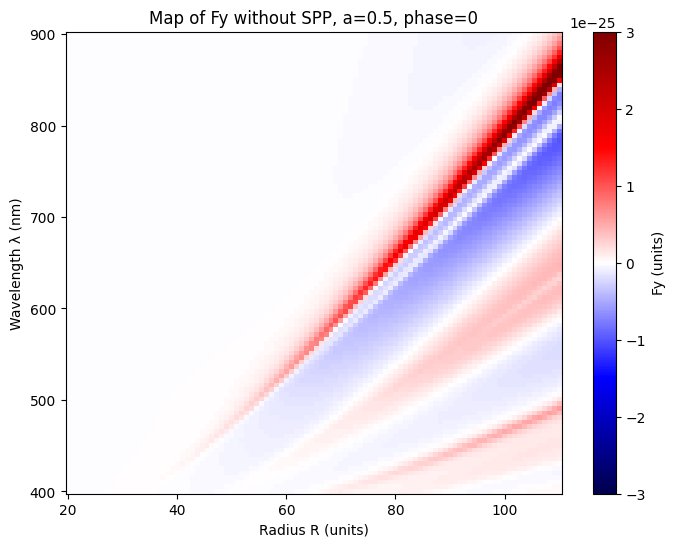

In [42]:

import matplotlib.pyplot as plt

# Load the computed F_x data
F_y = np.load('F_y_no_spp.npy')  # Shape: (len(wls), len(R), 8)

# Reconstruct the wls and R arrays used in the computation
wls = np.linspace(400, 900, 100)  # Wavelengths (in nm)
R = np.linspace(20, 110, 100)     # Radii (in appropriate units)

# Choose the component of F_x to plot
# The third dimension has size 8, so select an index from 0 to 7
component_index = 0  # Change this to plot a different component
F_y_component = F_y[:, :, component_index]  # Shape: (len(wls), len(R))

# Create a meshgrid for plotting
WLS, RADIUS = np.meshgrid(wls, R, indexing='ij')  # WLS and RADIUS match the shape of F_x_component

# Plotting the heatmap

plt.figure(figsize=(8, 6))
contour = plt.pcolormesh(RADIUS, WLS, F_y_component, cmap='seismic', vmax=3e-25, vmin=-3e-25)
plt.colorbar(contour, label='Fy (units)')
plt.xlabel('Radius R (units)')
plt.ylabel('Wavelength λ (nm)')
plt.title(f'Map of Fy without SPP, a=0.5, phase=0')
plt.savefig('f_y_tot_no_spp.pdf')
plt.show()


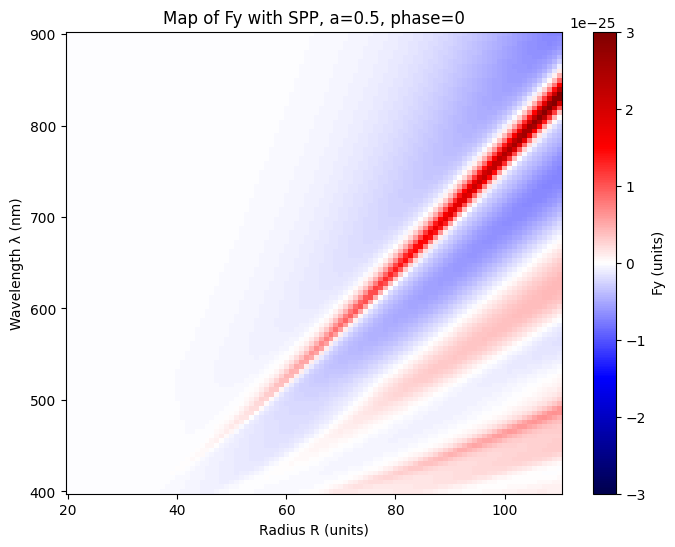

In [41]:

import matplotlib.pyplot as plt

# Load the computed F_x data
F_y = np.load('F_y.npy')  # Shape: (len(wls), len(R), 8)

# Reconstruct the wls and R arrays used in the computation
wls = np.linspace(400, 900, 100)  # Wavelengths (in nm)
R = np.linspace(20, 110, 100)     # Radii (in appropriate units)

# Choose the component of F_x to plot
# The third dimension has size 8, so select an index from 0 to 7
component_index = 0  # Change this to plot a different component
F_y_component = F_y[:, :, component_index]  # Shape: (len(wls), len(R))

# Create a meshgrid for plotting
WLS, RADIUS = np.meshgrid(wls, R, indexing='ij')  # WLS and RADIUS match the shape of F_x_component

# Plotting the heatmap
plt.figure(figsize=(8, 6))
contour = plt.pcolormesh(RADIUS, WLS, F_y_component, cmap='seismic', vmax=3e-25, vmin=-3e-25)
plt.colorbar(contour, label='Fy (units)')
plt.xlabel('Radius R (units)')
plt.ylabel('Wavelength λ (nm)')
plt.title(f'Map of Fy with SPP, a=0.5, phase=0')
plt.savefig('f_y_map_spp.pdf')
plt.show()


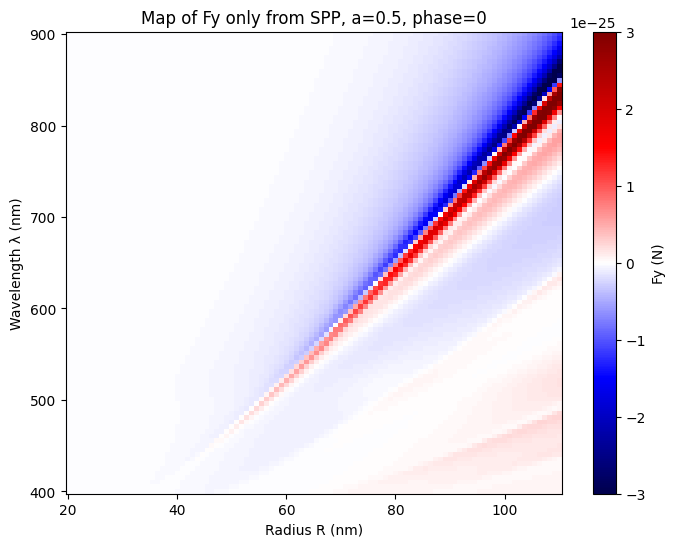

In [43]:

import matplotlib.pyplot as plt

# Load the computed F_x data
F_y_no_spp = np.load('F_y_no_spp.npy')  # Shape: (len(wls), len(R), 8)
F_y_spp = np.load('F_y.npy')  # Shape: (len(wls), len(R), 8)

# Reconstruct the wls and R arrays used in the computation
wls = np.linspace(400, 900, 100)  # Wavelengths (in nm)
R = np.linspace(20, 110, 100)     # Radii (in appropriate units)

# Choose the component of F_x to plot
# The third dimension has size 8, so select an index from 0 to 7
component_index = 0  # Change this to plot a different component
F_y_component_spp= F_y_spp[:, :, component_index]  # Shape: (len(wls), len(R))
F_y_component_no_spp= F_y_no_spp[:, :, component_index]  # Shape: (len(wls), len(R))

# Create a meshgrid for plotting
WLS, RADIUS = np.meshgrid(wls, R, indexing='ij')  # WLS and RADIUS match the shape of F_x_component

# Plotting the heatmap
plt.figure(figsize=(8, 6))
contour = plt.pcolormesh(RADIUS, WLS, F_y_component_spp-F_y_component_no_spp, cmap='seismic', vmax=3e-25, vmin=-3e-25)
plt.colorbar(contour, label='Fy (N)')
plt.xlabel('Radius R (nm)')
plt.ylabel('Wavelength λ (nm)')
plt.title(f'Map of Fy only from SPP, a=0.5, phase=0')
plt.savefig('f_y_map_spp_only.pdf')
plt.show()


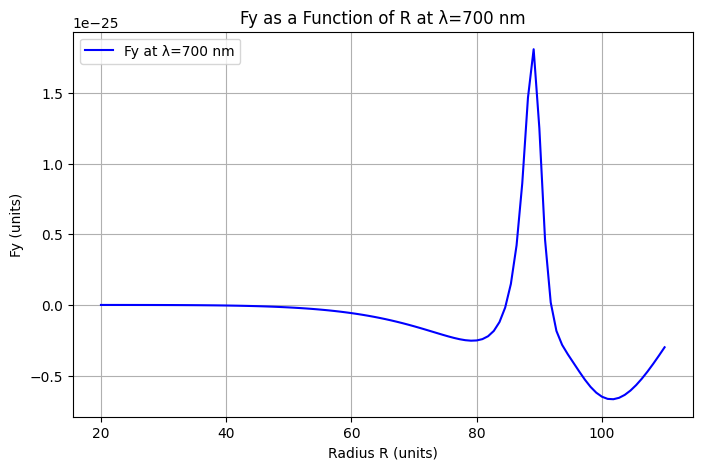

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Load the computed F_y data
F_y = np.load('F_y.npy')  # Shape: (len(wls), len(R), 8)

# Reconstruct the wls and R arrays used in the computation
wls = np.linspace(400, 900, 100)  # Wavelengths (in nm)
R = np.linspace(20, 110, 100)     # Radii (in appropriate units)

# Choose the component of F_y to plot
component_index = 0  # Change this to plot a different component
F_y_component = F_y[:, :, component_index]  # Shape: (len(wls), len(R))

# Find the index corresponding to λ = 700 nm
lambda_target = 700
lambda_index = np.argmin(np.abs(wls - lambda_target))

# Extract the slice F_y(R) at λ = 700 nm
F_y_slice = F_y_component[lambda_index, :]

# Plot the extracted slice
plt.figure(figsize=(8, 5))
plt.plot(R, F_y_slice, label=f'Fy at λ={lambda_target} nm', color='b')
plt.xlabel('Radius R (units)')
plt.ylabel('Fy (units)')
plt.title(f'Fy as a Function of R at λ={lambda_target} nm')
plt.legend()
plt.grid()
plt.show()

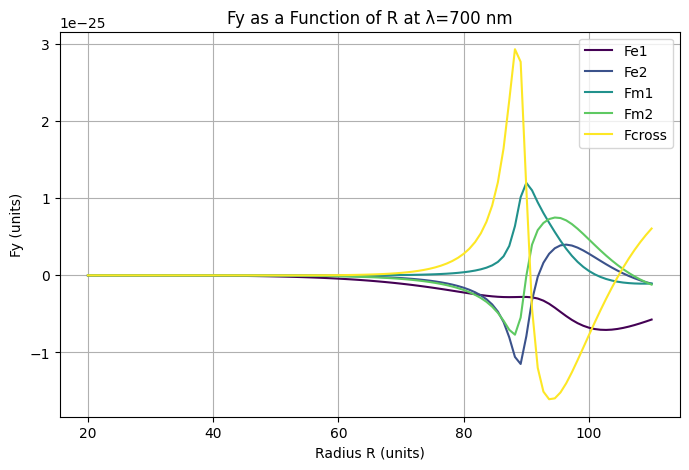

In [52]:
import numpy as np
import matplotlib.pyplot as plt

# Load the computed F_y data
F_y = np.load('F_y.npy')  # Shape: (len(wls), len(R), 8)

labels = ['Ftot', 'Fe0', 'Fe1', 'Fe2', 'Fm0', 'Fm1', 'Fm2', 'Fcross']

# Reconstruct the wls and R arrays used in the computation
wls = np.linspace(400, 900, 100)  # Wavelengths (in nm)
R = np.linspace(20, 110, 100)     # Radii (in appropriate units)

# Find the index corresponding to λ = 700 nm
lambda_target = 700
lambda_index = np.argmin(np.abs(wls - lambda_target))

# Select components to plot (change this list to select specific components)
selected_components = [2,3,5,6, 7]  # Choose from 0 to 7

# Plot all selected components
plt.figure(figsize=(8, 5))
colors = plt.cm.viridis(np.linspace(0, 1, len(selected_components)))  # Generate colors for each component

for i, comp in enumerate(selected_components):
    F_y_slice = F_y[:, :, comp][lambda_index, :]
    plt.plot(R, F_y_slice, label=labels[comp], color=colors[i])

plt.xlabel('Radius R (units)')
plt.ylabel('Fy (units)')
plt.title(f'Fy as a Function of R at λ={lambda_target} nm')
plt.legend()
plt.grid()
plt.show()

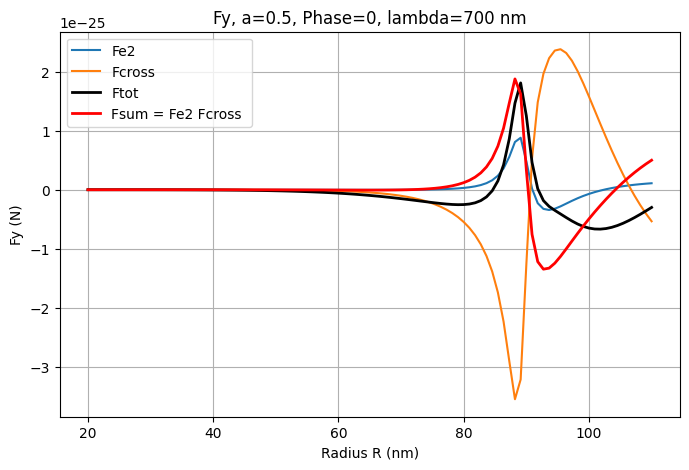

In [60]:
import numpy as np
import matplotlib.pyplot as plt

# Load the computed F_y data
F_y = np.load('F_y.npy')  # Shape: (len(wls), len(R), 8)

labels = ['Ftot', 'Fe0', 'Fe1', 'Fe2', 'Fm0', 'Fm1', 'Fm2', 'Fcross']

# Reconstruct the wls and R arrays used in the computation
wls = np.linspace(400, 900, 100)  # Wavelengths (in nm)
R = np.linspace(20, 110, 100)     # Radii (in appropriate units)

# Find the index corresponding to λ = 700 nm
lambda_target = 700
lambda_index = np.argmin(np.abs(wls - lambda_target))

# Select components to plot (change this list to select specific components)
selected_components = [3,7]  # Choose from 0 to 7

# Plot all selected components
plt.figure(figsize=(8, 5))
colors = plt.cm.viridis(np.linspace(0, 1, len(selected_components)))  # Generate colors for each component
Ftot = F_y[:, :, 0][lambda_index, :]
# Fsum = np.empty_like(Ftot)
for i, comp in enumerate(selected_components):
    plt.plot(R, F_x[:, :, comp][lambda_index, :], label=labels[comp])
    if i==0:
        Fsum = F_y[:, :, comp][lambda_index, :]
    else:
        Fsum +=  F_y[:, :, comp][lambda_index, :]

lab=''
for i in selected_components:
    lab += str(labels[i])+' '
    
plt.plot(R, Ftot, label='Ftot', lw=2, c='black')
plt.plot(R, Fsum, label='Fsum = '+ lab, lw=2, c='r')

plt.xlabel('Radius R (nm)')
plt.ylabel('Fy (N)')
plt.title(f'Fy, a=0.5, Phase=0, lambda={lambda_target} nm')
plt.legend()
plt.grid()
#plt.savefig('Fy_partical_a05_Phase0_600nm.pdf')
plt.show()

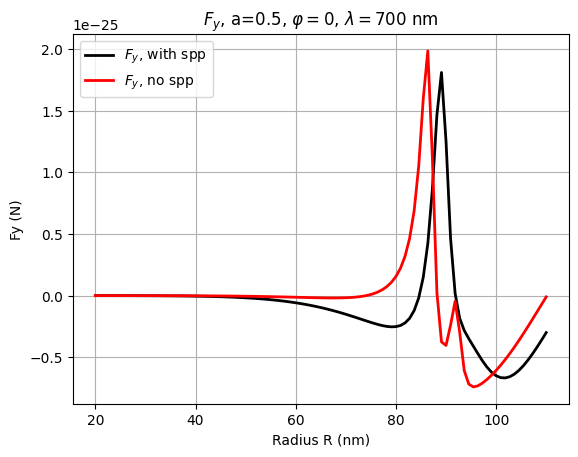

In [44]:
import numpy as np
import matplotlib.pyplot as plt

# Load the computed F_y data
F_y = np.load('F_y.npy')  # Shape: (len(wls), len(R), 8)
F_y_no_spp = np.load('F_y_no_spp.npy')

# Reconstruct the wls and R arrays used in the computation
wls = np.linspace(400, 900, 100)  # Wavelengths (in nm)
R = np.linspace(20, 110, 100)     # Radii (in appropriate units)

# Find the index corresponding to λ = 700 nm
lambda_target = 700
lambda_index = np.argmin(np.abs(wls - lambda_target))


F_y = F_y[:, :, 0][lambda_index, :]
F_y_no_spp = F_y_no_spp[:, :, 0][lambda_index, :]


plt.plot(R, F_y, label='$F_y$, with spp', lw=2, c='black')
plt.plot(R, F_y_no_spp, label='$F_y$, no spp', lw=2, c='r')
#plt.plot(R, F_y- F_y_no_spp, label=r'$F_y^{spp}$', lw=2, c='b', ls='--')

plt.xlabel('Radius R (nm)')
plt.ylabel('Fy (N)')
plt.title(f'$F_y$, a=0.5, $\\varphi=0$, $\lambda=${lambda_target} nm')
plt.legend()
plt.grid()
plt.savefig('Fy_spp_difference.pdf')
plt.show()

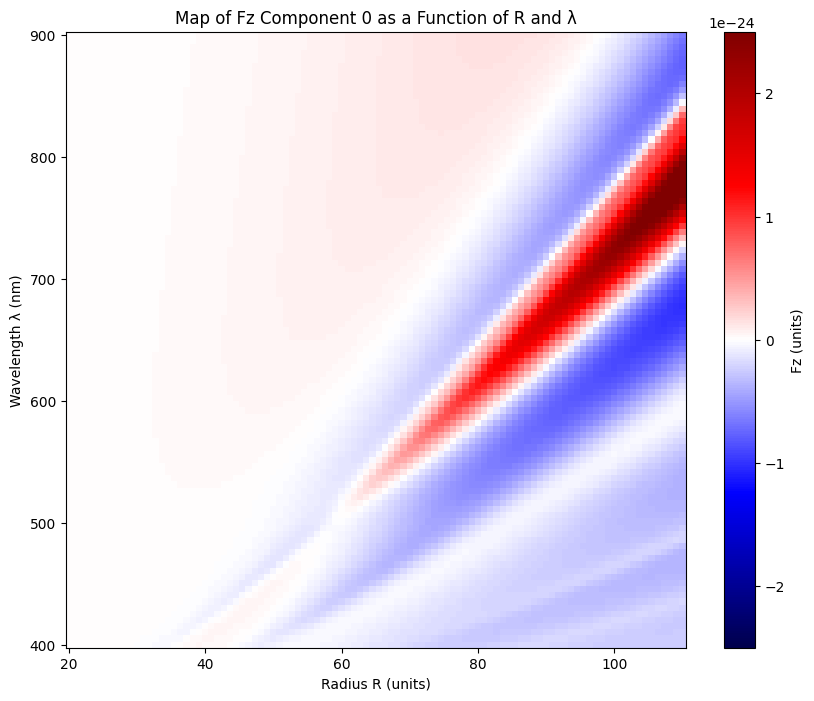

In [24]:
import numpy as np
import matplotlib.pyplot as plt

# Load the computed F_x data
F_z= np.load('F_z.npy')  # Shape: (len(wls), len(R), 8)

# Reconstruct the wls and R arrays used in the computation
wls = np.linspace(400, 900, 100)  # Wavelengths (in nm)
R = np.linspace(20, 110, 100)     # Radii (in appropriate units)

# Choose the component of F_x to plot
# The third dimension has size 8, so select an index from 0 to 7
component_index = 0  # Change this to plot a different component
F_z_component = F_z[:, :, component_index]  # Shape: (len(wls), len(R))

# Create a meshgrid for plotting
WLS, RADIUS = np.meshgrid(wls, R, indexing='ij')  # WLS and RADIUS match the shape of F_x_component

# Plotting the heatmap
plt.figure(figsize=(10, 8))
contour = plt.pcolormesh(RADIUS, WLS, F_z_component, cmap='seismic', vmin=-2.5e-24, vmax=2.5e-24)
plt.colorbar(contour, label='Fz (units)')
plt.xlabel('Radius R (units)')
plt.ylabel('Wavelength λ (nm)')
plt.title(f'Map of Fz Component {component_index} as a Function of R and λ')
plt.show()


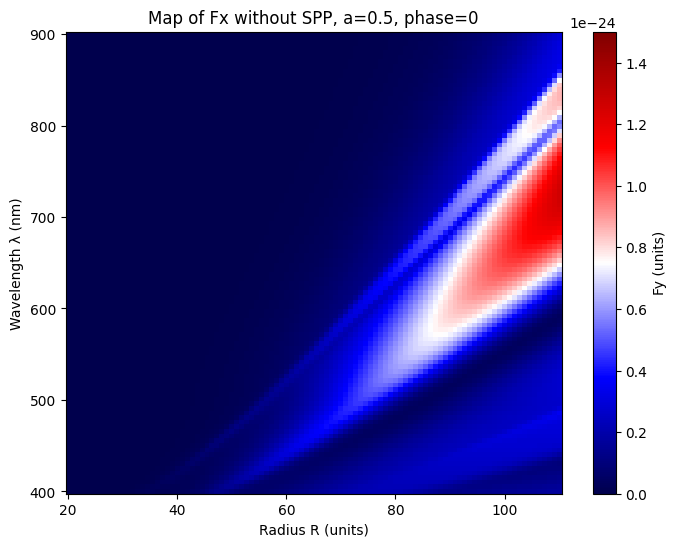

In [51]:

import matplotlib.pyplot as plt

# Load the computed F_x data
F_x = np.load('F_x_no_spp.npy')  # Shape: (len(wls), len(R), 8)

# Reconstruct the wls and R arrays used in the computation
wls = np.linspace(400, 900, 100)  # Wavelengths (in nm)
R = np.linspace(20, 110, 100)     # Radii (in appropriate units)

# Choose the component of F_x to plot
# The third dimension has size 8, so select an index from 0 to 7
component_index = 0  # Change this to plot a different component
F_x_component = F_x[:, :, component_index]  # Shape: (len(wls), len(R))

# Create a meshgrid for plotting
WLS, RADIUS = np.meshgrid(wls, R, indexing='ij')  # WLS and RADIUS match the shape of F_x_component

# Plotting the heatmap

plt.figure(figsize=(8, 6))
contour = plt.pcolormesh(RADIUS, WLS, F_x_component, cmap='seismic', vmax=1.5e-24, vmin=-0)
plt.colorbar(contour, label='Fy (units)')
plt.xlabel('Radius R (units)')
plt.ylabel('Wavelength λ (nm)')
plt.title(f'Map of Fx without SPP, a=0.5, phase=0')
plt.savefig('f_x_tot_no_spp.pdf')
plt.show()


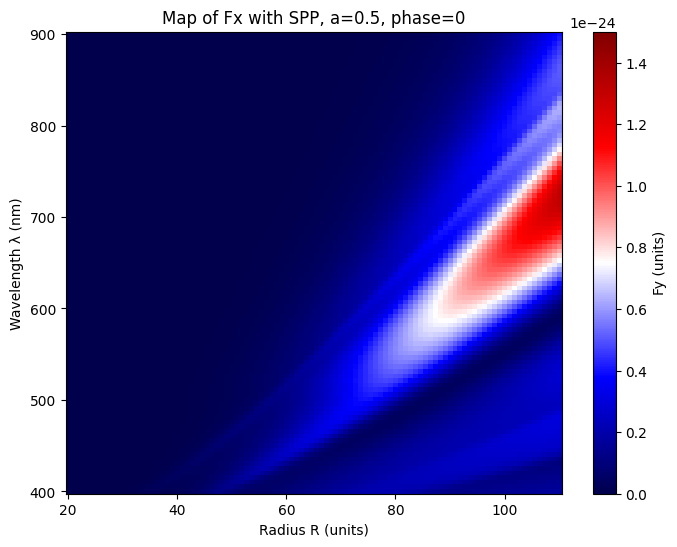

In [56]:

import matplotlib.pyplot as plt

# Load the computed F_x data
F_x = np.load('F_x.npy')  # Shape: (len(wls), len(R), 8)

# Reconstruct the wls and R arrays used in the computation
wls = np.linspace(400, 900, 100)  # Wavelengths (in nm)
R = np.linspace(20, 110, 100)     # Radii (in appropriate units)

# Choose the component of F_x to plot
# The third dimension has size 8, so select an index from 0 to 7
component_index = 0  # Change this to plot a different component
F_x_component = F_x[:, :, component_index]  # Shape: (len(wls), len(R))

# Create a meshgrid for plotting
WLS, RADIUS = np.meshgrid(wls, R, indexing='ij')  # WLS and RADIUS match the shape of F_x_component

# Plotting the heatmap
plt.figure(figsize=(8, 6))
contour = plt.pcolormesh(RADIUS, WLS, F_x_component, cmap='seismic', vmax=1.5e-24, vmin=0)
plt.colorbar(contour, label='Fy (units)')
plt.xlabel('Radius R (units)')
plt.ylabel('Wavelength λ (nm)')
plt.title(f'Map of Fx with SPP, a=0.5, phase=0')
plt.savefig('f_x_map_spp.pdf')
plt.show()


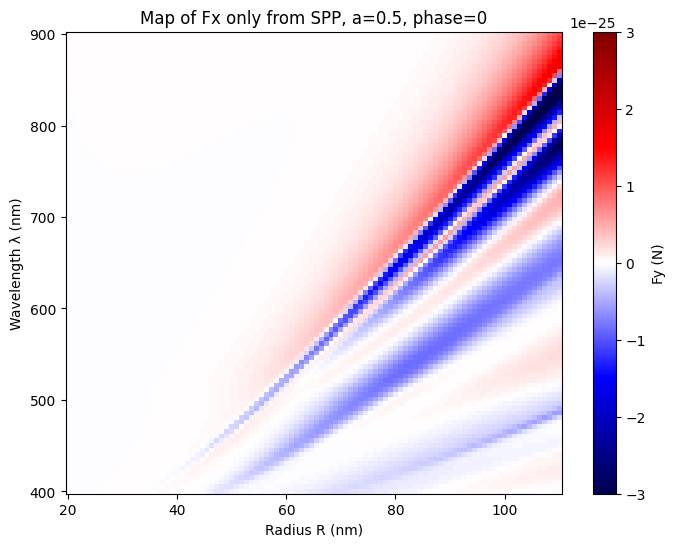

In [59]:

import matplotlib.pyplot as plt

# Load the computed F_x data
F_x_no_spp = np.load('F_x_no_spp.npy')  # Shape: (len(wls), len(R), 8)
F_x_spp = np.load('F_x.npy')  # Shape: (len(wls), len(R), 8)

# Reconstruct the wls and R arrays used in the computation
wls = np.linspace(400, 900, 100)  # Wavelengths (in nm)
R = np.linspace(20, 110, 100)     # Radii (in appropriate units)

# Choose the component of F_x to plot
# The third dimension has size 8, so select an index from 0 to 7
component_index = 0  # Change this to plot a different component
F_x_component_spp= F_x_spp[:, :, component_index]  # Shape: (len(wls), len(R))
F_x_component_no_spp= F_x_no_spp[:, :, component_index]  # Shape: (len(wls), len(R))

# Create a meshgrid for plotting
WLS, RADIUS = np.meshgrid(wls, R, indexing='ij')  # WLS and RADIUS match the shape of F_x_component

# Plotting the heatmap
plt.figure(figsize=(8, 6))
contour = plt.pcolormesh(RADIUS, WLS, F_x_component_spp-F_x_component_no_spp, cmap='seismic', vmax=3e-25, vmin=-3e-25)
plt.colorbar(contour, label='Fy (N)')
plt.xlabel('Radius R (nm)')
plt.ylabel('Wavelength λ (nm)')
plt.title(f'Map of Fx only from SPP, a=0.5, phase=0')
plt.savefig('f_x_map_spp_only.pdf')
plt.show()


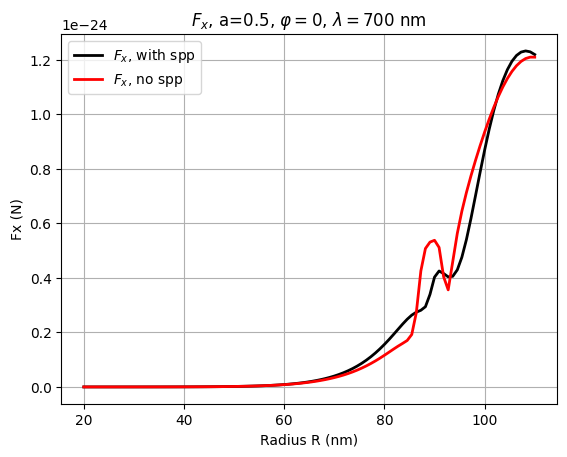

In [61]:
import numpy as np
import matplotlib.pyplot as plt

# Load the computed F_y data
F_x = np.load('F_x.npy')  # Shape: (len(wls), len(R), 8)
F_x_no_spp = np.load('F_x_no_spp.npy')

# Reconstruct the wls and R arrays used in the computation
wls = np.linspace(400, 900, 100)  # Wavelengths (in nm)
R = np.linspace(20, 110, 100)     # Radii (in appropriate units)

# Find the index corresponding to λ = 700 nm
lambda_target = 700
lambda_index = np.argmin(np.abs(wls - lambda_target))


F_x = F_x[:, :, 0][lambda_index, :]
F_x_no_spp = F_x_no_spp[:, :, 0][lambda_index, :]


plt.plot(R, F_x, label='$F_x$, with spp', lw=2, c='black')
plt.plot(R, F_x_no_spp, label='$F_x$, no spp', lw=2, c='r')
#plt.plot(R, F_y- F_y_no_spp, label=r'$F_y^{spp}$', lw=2, c='b', ls='--')

plt.xlabel('Radius R (nm)')
plt.ylabel('Fx (N)')
plt.title(f'$F_x$, a=0.5, $\\varphi=0$, $\lambda=${lambda_target} nm')
plt.legend()
plt.grid()
plt.savefig('Fx_spp_difference.pdf')
plt.show()

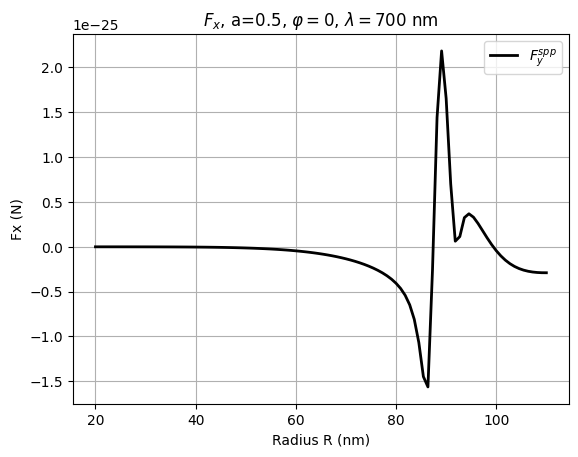

In [63]:
import numpy as np
import matplotlib.pyplot as plt

# Load the computed F_y data
F_x = np.load('F_x.npy')  # Shape: (len(wls), len(R), 8)
F_x_no_spp = np.load('F_x_no_spp.npy')

# Reconstruct the wls and R arrays used in the computation
wls = np.linspace(400, 900, 100)  # Wavelengths (in nm)
R = np.linspace(20, 110, 100)     # Radii (in appropriate units)

# Find the index corresponding to λ = 700 nm
lambda_target = 700
lambda_index = np.argmin(np.abs(wls - lambda_target))


F_x = F_x[:, :, 0][lambda_index, :]
F_x_no_spp = F_x_no_spp[:, :, 0][lambda_index, :]



plt.plot(R, F_y- F_y_no_spp, label=r'$F_y^{spp}$', lw=2, c='black')

plt.xlabel('Radius R (nm)')
plt.ylabel('Fx (N)')
plt.title(f'$F_x$, a=0.5, $\\varphi=0$, $\lambda=${lambda_target} nm')
plt.legend()
plt.grid()
plt.savefig('Fx_only_spp.pdf')
plt.show()